In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\orders.csv')
products = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\products.csv')
departments = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\departments.csv')
aisles = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\aisles.csv')
orders_prior = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\order_products__prior.csv')
orders_train = pd.read_csv(r'B:\utd\comp\Instacart-Kaggle\order_products__train.csv')


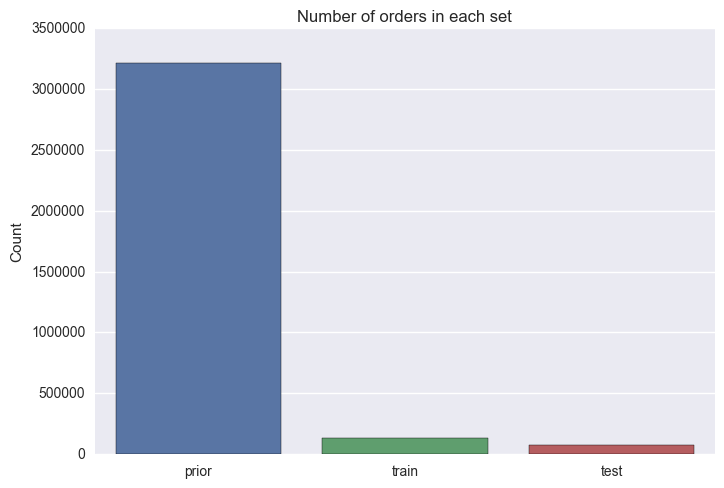

In [4]:
#The orders data has the data from the prior, train and test sets. Lets look at the number of orders from each set 
order_count = orders['eval_set'].value_counts()
sns.barplot(x = order_count.index, y = order_count.values)
plt.ylabel('Count')
plt.title('Number of orders in each set')
plt.show()

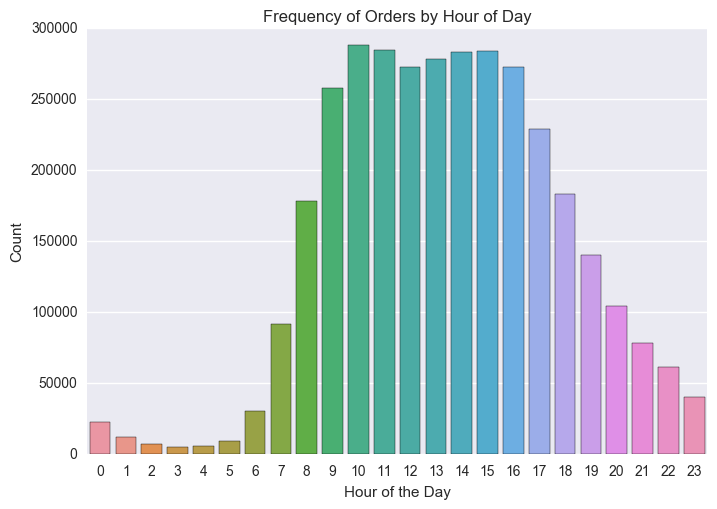

In [5]:
#When do people order
sns.countplot(x = 'order_hour_of_day', data = orders)
plt.ylabel('Count')
plt.xlabel('Hour of the Day')
plt.title('Frequency of Orders by Hour of Day')
plt.show()



In [7]:
#From the gragh we can see that maximum orders where placed during the day time

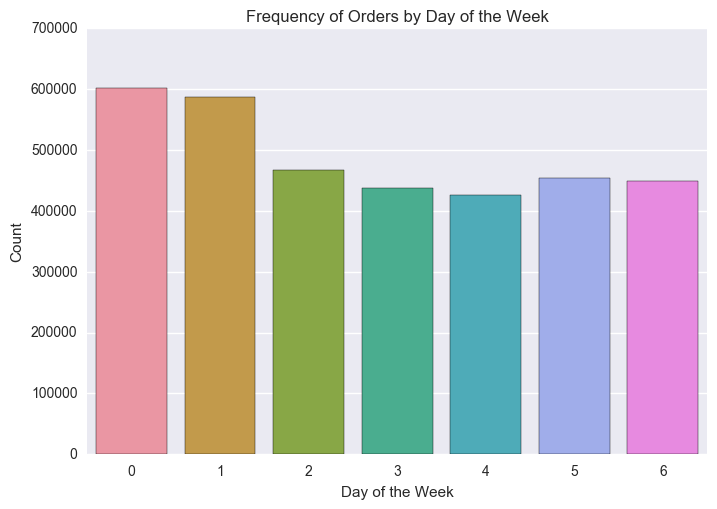

In [6]:
#What day of the week people order
sns.countplot(x = 'order_dow', data = orders)
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.title('Frequency of Orders by Day of the Week')
plt.show()


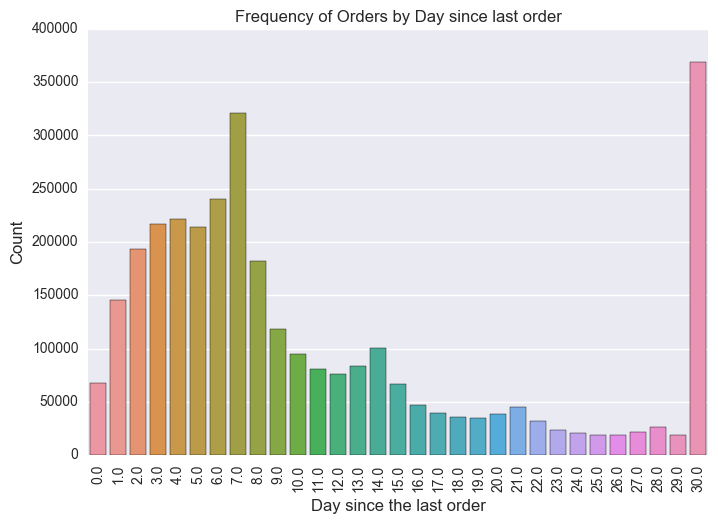

In [8]:
#When do they order again?
sns.countplot(x = 'days_since_prior_order', data = orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day since the last order', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.title('Frequency of Orders by Day since last order')
plt.show()


In [9]:
#There seems to be two kind of buyers. The one's who shop weekly and ones who shop monthly.
#We can say that the dataset contains more than half of people that are weekly shoppers with maximum number of people ordering at 7th day i.e. last day of the week.


In [10]:
#Percentage of products in the prior set
orders_prior.reordered.sum()/orders_prior.shape[0]



0.5896974667922161

In [11]:
#Percentage of products in the train set
orders_train.reordered.sum()/orders_train.shape[0]


0.5985944127509629

In [12]:
#Approximately 59% of the products that are ordered are also reordered again by the same customer after sometime

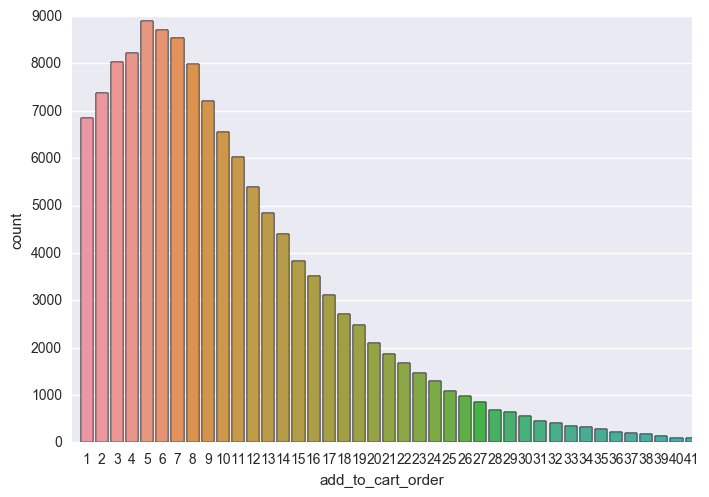

In [15]:
# How many items do users buy
pd = orders_train[['order_id', 'add_to_cart_order']].groupby('order_id').last()
d = sns.countplot(x = 'add_to_cart_order', data = pd)
d.set(xlim=(-1,40))
plt.show()

In [16]:
#It is a right tailed distribution with maximum value at 5. 

In [ ]:
#Which products where sold the most?
d1 = orders_train[['product_id']].groupby(orders_train['product_id']).count().add_prefix('count_')

#products.set_index('product_id')
d1.sort_values(by= 'count_product_id' ,ascending=False, inplace=True)
d1.reset_index(inplace=True)
d1.head()
products.head()
dat = pd.merge(d1, products, on = 'product_id')
#Top 10 most frequent bought products from training set
dat.head(n=10)


In [ ]:
d2 = orders_prior[['product_id']].groupby(orders_prior['product_id']).count().add_prefix('count_')
d2.sort_values(by= 'count_product_id' ,ascending=False, inplace=True)
d2.reset_index(inplace=True)
dat2 = pd.merge(d2, products[['product_id', 'product_name']], on = 'product_id')
#Top 10 most frequent bought products from prior set
dat2.head(n=10)


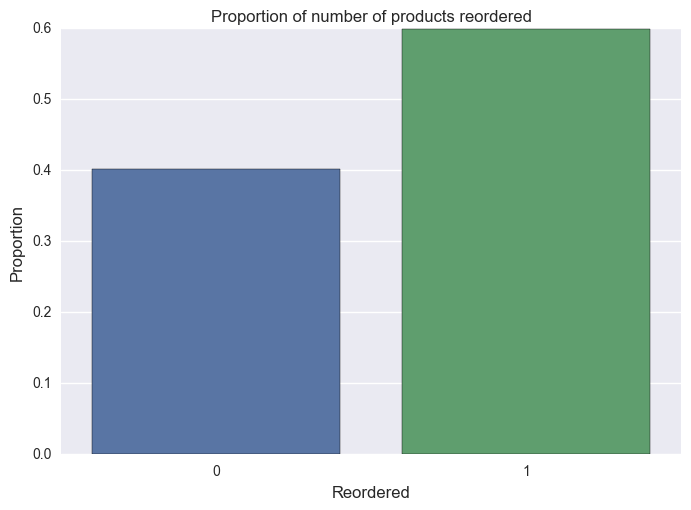

In [20]:
#How often do users order the same product again?
df2 = orders_train.groupby(orders_train['reordered'])['reordered'].agg(['count'])
df2['proportion'] = df2['count']/df2['count'].sum()
df2.reset_index(inplace = True)
df2.head()
sns.barplot(x = df2['reordered'], y = df2['proportion'])
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Reordered', fontsize=12)
plt.title('Proportion of number of products reordered')
plt.show()


In [21]:
#which is the most reordered item
df3 = orders_train.groupby(orders_train['product_id'])['reordered'].agg(['mean', 'count'])
df3.reset_index(inplace=True)
#I will filter out products for which reordered count is less than 40
df3 = df3.query('mean != 1.0 & count > 40')
df3 = df3.merge(products, on ='product_id')
df3.head(n=10)



,product_id,mean,count,product_name,aisle_id,department_id
0,1,0.644737,76,Chocolate Sandwich Cookies,61,19
1,10,0.588235,119,Sparkling Orange Juice & Prickly Pear Beverage,115,7
2,23,0.528571,70,Organic Turkey Burgers,49,12
3,25,0.593023,86,Salted Caramel Lean Protein & Fiber Bar,3,19
4,34,0.658436,243,Peanut Butter Cereal,121,14
5,45,0.697600,625,European Cucumber,83,4
6,49,0.622449,98,Vegetarian Grain Meat Sausages Italian - 4 CT,14,20
7,54,0.671053,76,24/7 Performance Cat Litter,41,8
8,63,0.474576,59,Banana & Sweet Potato Organic Teething Wafers,92,18
9,79,0.494118,170,Wild Albacore Tuna No Salt Added,95,15


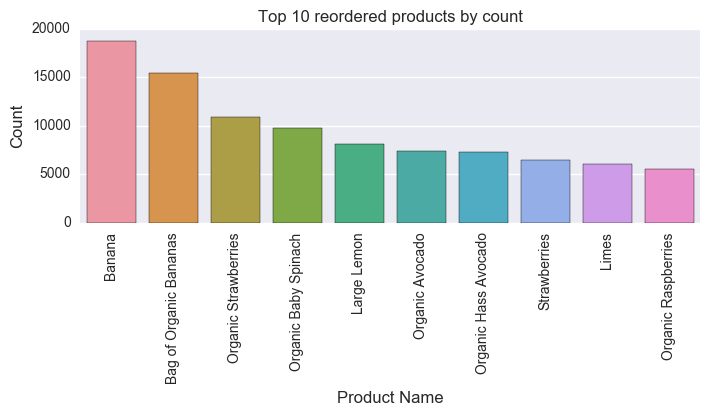

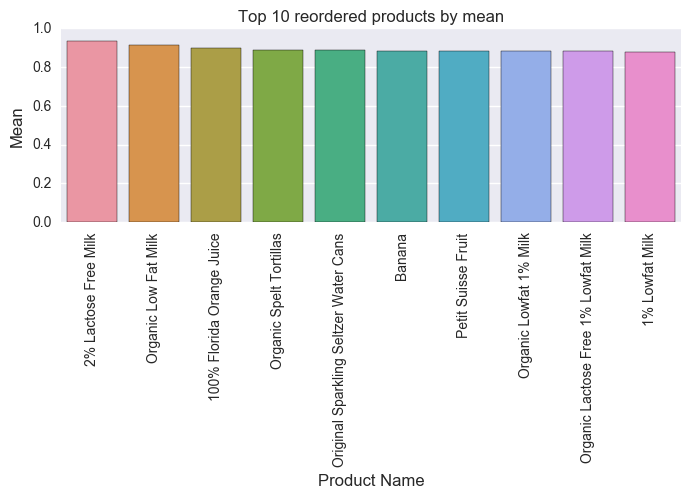

In [22]:
plt.subplot(211)
df3.sort_values(by=['count'], ascending=False, inplace=True)
sns.barplot(x = df3['product_name'].head(n=10), y = df3['count'].head(n=10))
plt.xticks(rotation = 'vertical')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.title('Top 10 reordered products by count')
plt.show()

plt.subplot(211)
df3.sort_values(by=['mean'], ascending=False, inplace=True)
sns.barplot(x = df3['product_name'].head(n=10), y = df3['mean'].head(n=10))
plt.xticks(rotation = 'vertical')
plt.ylabel('Mean', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.title('Top 10 reordered products by mean')
plt.show()



In [ ]:
#Which Items do people put first in the cart
df4 = orders_train.groupby(['product_id', 'add_to_cart_order'])['product_id'].agg(['count'])
df4.reset_index(inplace=True)

df2=df4.groupby(['product_id'])['count'].agg(['sum'])
df2.reset_index(inplace=True)

result = pd.merge(df4, df2, on='product_id')
result=result[ (result['add_to_cart_order'] == 1) & (result['count'] > 10)]
result['pct']=result['count']/result['sum']
result=result.sort('pct', ascending=False)
result.drop(['sum','add_to_cart_order'], axis = 1, inplace=True)
result = pd.merge(result, products[['product_id', 'product_name']], on='product_id')
result.head()


In [24]:
sns.barplot(x=result['product_name'].head(n=10), y=result['pct'].head(n=10))  
plt.xticks(rotation='vertical')
plt.ylabel('Proportion')
plt.xlabel('Product Names')
plt.title('Top 10 items put first in cart')
plt.show()


NameError: name 'result' is not defined

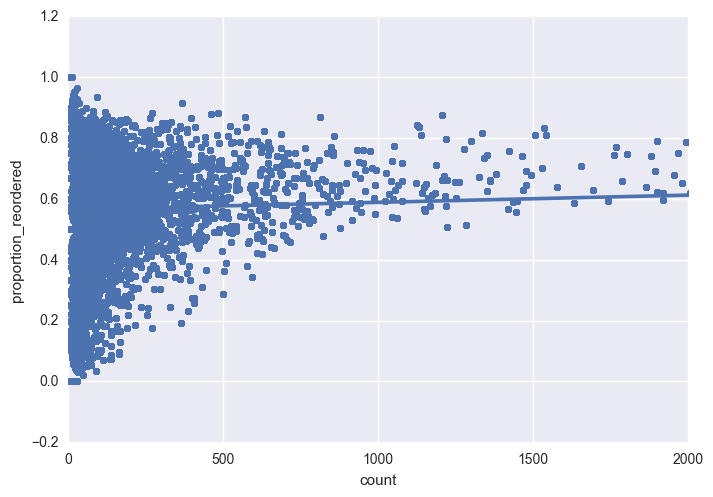

In [25]:
#number of orders and probabilty of reordered for products
df1 = orders_train.copy()
df1['count'] = df1.groupby(['product_id'])['product_id'].transform('count')
df1['proportion_reordered'] = df1.groupby(['product_id'])['reordered'].transform('mean')
g = sns.regplot(x = 'count', y = 'proportion_reordered', data = df1)
g.set(xlim=(0,2000))
plt.show()

In [26]:
#Organic VS Non-Organic
string = "organic"
products['organic'] = 0
for index,row in products.iterrows():
    if string in products.iloc[index, 1].lower():
        products.iloc[index, 4] = 1

products.head(n=50)


,product_id,product_name,aisle_id,department_id,organic
0,1,Chocolate Sandwich Cookies,61,19,0
1,2,All-Seasons Salt,104,13,0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0
4,5,Green Chile Anytime Sauce,5,13,0
5,6,Dry Nose Oil,11,11,0
6,7,Pure Coconut Water With Orange,98,7,0
7,8,Cut Russet Potatoes Steam N' Mash,116,1,0
8,9,Light Strawberry Blueberry Yogurt,120,16,0
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,0


C:\Users\NITANT\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


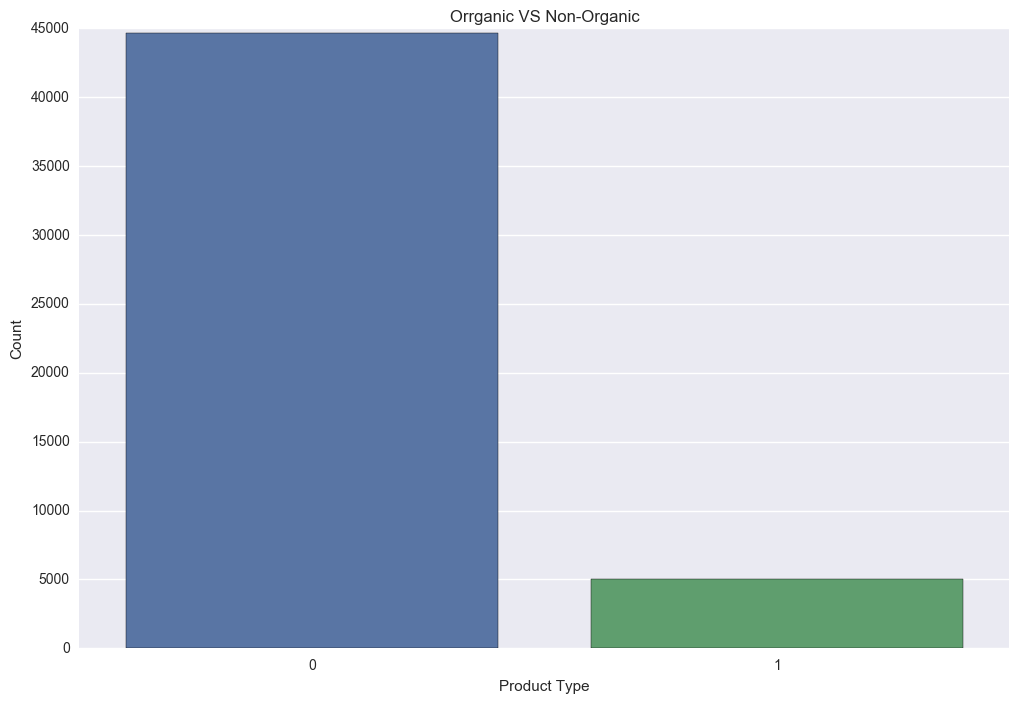

In [27]:
cnt_organic = products.organic.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_organic.index, cnt_organic.values)
plt.ylabel('Count')
plt.xlabel('Product Type')
plt.title('Orrganic VS Non-Organic')
plt.legend()
plt.show()


In [ ]:
# From which aisle are most of the products sold
orders_products = pd.merge(orders_prior, products, on='product_id')
orders_products = pd.merge(orders_products, aisles, on='aisle_id')
orders_products = pd.merge(orders_products, departments, on='department_id')
cnt_aise = orders_products['aisle'].value_counts().head(20)

plt.figure(figsize=(12,8))
sns.barplot(cnt_aise.index, cnt_aise.values)
plt.ylabel('Count')
plt.xlabel('Aisle Type')
plt.title('Products sold by aisle')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#reorder ratio of day of week vs hour of day
order_products_train = pd.merge(orders_train, orders, on='order_id')
grouped_df = order_products_train.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot("order_dow", "order_hour_of_day","reordered")

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()


In [ ]:
#Order Percentage by department
Order_Prod_Dept = pd.merge(orders_train[['order_id', 'product_id']], products, on='product_id', how='left') 
Order_Prod_Dept = pd.merge(Order_Prod_Dept, departments, on='department_id', how='left')

plt.figure(figsize=(10,10))
products_by_dept = Order_Prod_Dept['department'].value_counts()
labels = (np.array(products_by_dept.index))
sizes = (np.array((products_by_dept / products_by_dept.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()
